# Solar Data Visualization
### Hydronic Simulator

Ian A. Ruiz


In [106]:
# !pip install matplotlib

In [107]:
import math

from matplotlib import pyplot as plt
import matplotlib.font_manager as font_manager
import os

from solar_geometry_predictor import SolarGeometryPredictor

In [108]:
def get_font_directory_path():
    return os.path.join(os.getcwd(), 'fonts')


def get_image_directory_path():
    return os.path.join(os.getcwd(), 'images')


def get_image_full_path(name):
    return os.path.join(get_image_directory_path(), name)

In [109]:
files = font_manager.findSystemFonts(fontpaths=[get_font_directory_path()], fontext="ttf")
for file in files:
    font_manager.fontManager.addfont(file)

plt.rcParams["font.family"] = "CMU Serif"
plt.rc('axes', unicode_minus=False)

In [110]:
days = [day for day in range(1, 365)]

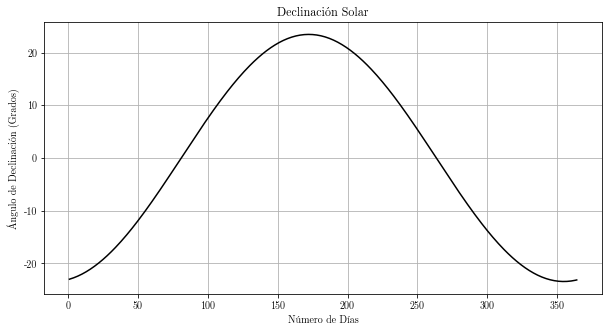

In [111]:
solar_declination = [SolarGeometryPredictor.calculate_solar_declination(day) for day in days]

fig = plt.figure()
fig.set_size_inches(10, 5)

plt.plot(days, solar_declination, color="black")
plt.title("Declinación Solar")
plt.ylabel("Ángulo de Declinación (Grados)")
plt.xlabel("Número de Días")
plt.grid()

plt.savefig(get_image_full_path("solardeclination.pdf"), transparent=True)
plt.savefig(get_image_full_path("solardeclination.svg"), transparent=True)
plt.show()

In [112]:
def calculate_extraterrestrial_solar_radiation(day_number):
    solar_constant = 1367.0
    b = ((day_number - 1) * (360.0 / 365.0)) * math.pi / 180.0
    return solar_constant * (1.000110 + 0.034221 * (math.cos(b)) + 0.001280 * (math.sin(b)) + 0.000719 * (
        math.cos(2 * b)) + 0.000077 * (math.sin(2 * b)))

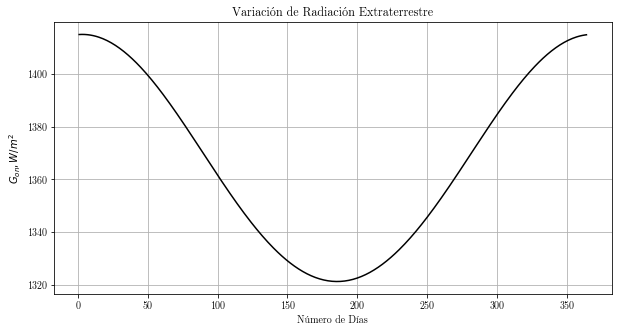

In [113]:
extraterrestrial_radiation = [calculate_extraterrestrial_solar_radiation(day) for day in days]

fig = plt.figure()
fig.set_size_inches(10, 5)

plt.plot(days, extraterrestrial_radiation, color="black")
plt.title("Variación de Radiación Extraterrestre")
plt.ylabel(r'$G_{on}, W / m^{2} $')
plt.xlabel("Número de Días")
plt.grid()

plt.savefig(get_image_full_path("variationextraterrestrialsolarradiation.pdf"), transparent=True)
plt.savefig(get_image_full_path("variationextraterrestrialsolarradiation.svg"), transparent=True)
plt.show()